<a href="https://colab.research.google.com/github/angeliki-tzanou/datasci_6_regression-/blob/main/HHA_507_week_7_(wine).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading dataset & packages:

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [3]:
# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
df = wine.data.features
df

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


iv= alcohol
dv= flavanoids

In [5]:
# Fit the regression model
X = sm.add_constant(df['Alcohol'])  # Adds a constant term to the predictor
print(X)
model = sm.OLS(df['Flavanoids'], X)
print(model)

     const  Alcohol
0      1.0    14.23
1      1.0    13.20
2      1.0    13.16
3      1.0    14.37
4      1.0    13.24
..     ...      ...
173    1.0    13.71
174    1.0    13.40
175    1.0    13.27
176    1.0    13.17
177    1.0    14.13

[178 rows x 2 columns]


### TEST#1:

In [6]:
results = model.fit()
residuals = results.resid
fitted = results.fittedvalues

#Print summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Flavanoids   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     10.46
Date:                Fri, 10 Nov 2023   Prob (F-statistic):            0.00146
Time:                        21:52:13   Log-Likelihood:                -246.73
No. Observations:                 178   AIC:                             497.5
Df Residuals:                     176   BIC:                             503.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7588      1.174     -1.498      0.1

In the table above we can see that the F-stat value of 0.001 shows a statistical significance in this relationship as well as the p-value of 0.001 shows a strong relationship.

In [7]:
### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=2.3899371469856194, p-value=3.0882100589536056e-05


The p-value above is extremely small much less than the signicant 0.005 threshold indicating that the relationship between alcohol and flavanoids is not linear, thus failing this test.



> Creating a scatter plot:



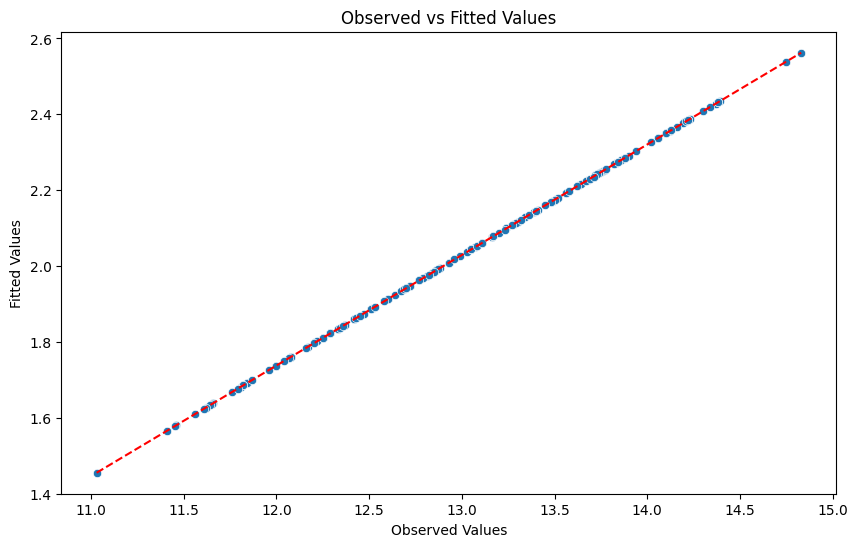

In [8]:
## A significant p-value indicates that the relationship is not linear.
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Alcohol'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['Alcohol']), max(df['Alcohol'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

The scatter plot above shows very minimal if any range of error since all the values fall within the predicted linear line, showing a strong linear relationship with minimal margin of error.

### TEST#2:


> Performing the Shapiro test:



Shapiro-Wilk Test: W=0.9456958174705505, p-value=2.636219278429053e-06


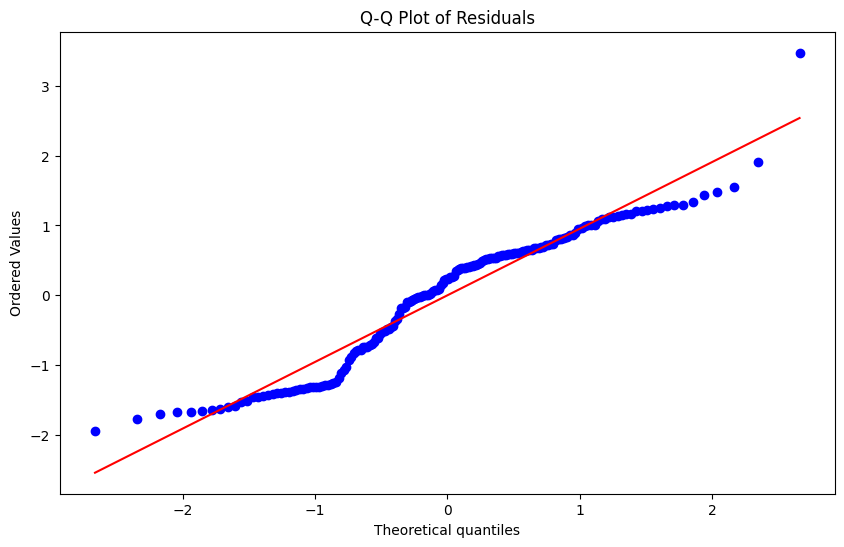

In [9]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

Throught the shapiro test perfomed above it is not a normal distribution of residuals, the p-value being significantly less than 0.05 supports a correlation between those two variables.

### TEST #3:

In [10]:
##### Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=1.9995164818409268, p-value=0.0007090877682898954


In the homogeneity test above we can see that the p-value is small indicating the existence of a relationship between those variables, whereas additionally proves that paired with the high F-stat value the variability of errors can be influenced through relationships in the data and are not consistent throughout.

### Adding more variables and retesting to see if results would change:

In [11]:
listofpredictors = df[['Alcohol', 'Malicacid', 'Ash', 'Magnesium', 'Proanthocyanins', 'Color_intensity']]
listofpredictors

,Alcohol,Malicacid,Ash,Magnesium,Proanthocyanins,Color_intensity
0,14.23,1.71,2.43,127,2.29,5.64
1,13.20,1.78,2.14,100,1.28,4.38
2,13.16,2.36,2.67,101,2.81,5.68
3,14.37,1.95,2.50,113,2.18,7.80
4,13.24,2.59,2.87,118,1.82,4.32
...,...,...,...,...,...,...
173,13.71,5.65,2.45,95,1.06,7.70
174,13.40,3.91,2.48,102,1.41,7.30
175,13.27,4.28,2.26,120,1.35,10.20
176,13.17,2.59,2.37,120,1.46,9.30


In [12]:
# Fit the regression model
X = sm.add_constant(listofpredictors)  # Adds a constant term to the predictor
print(X)
model = sm.OLS(df['Flavanoids'], X)
print(model)

     const  Alcohol  Malicacid   Ash  Magnesium  Proanthocyanins  \
0      1.0    14.23       1.71  2.43        127             2.29   
1      1.0    13.20       1.78  2.14        100             1.28   
2      1.0    13.16       2.36  2.67        101             2.81   
3      1.0    14.37       1.95  2.50        113             2.18   
4      1.0    13.24       2.59  2.87        118             1.82   
..     ...      ...        ...   ...        ...              ...   
173    1.0    13.71       5.65  2.45         95             1.06   
174    1.0    13.40       3.91  2.48        102             1.41   
175    1.0    13.27       4.28  2.26        120             1.35   
176    1.0    13.17       2.59  2.37        120             1.46   
177    1.0    14.13       4.10  2.74         96             1.35   

     Color_intensity  
0               5.64  
1               4.38  
2               5.68  
3               7.80  
4               4.32  
..               ...  
173             7.70  

### TEST#1B:

In [13]:
results = model.fit()
residuals = results.resid
fitted = results.fittedvalues

#Print summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Flavanoids   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     45.25
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           7.21e-33
Time:                        21:52:35   Log-Likelihood:                -167.25
No. Observations:                 178   AIC:                             348.5
Df Residuals:                     171   BIC:                             370.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.7862      0.917     

We could drop magnesium from the list of predictors above since its the only one that based on its very high p-value it doesnt contribute to the data testing.



> Removing the Mg column from the list of predictors:



In [14]:
listofpredictors = df[['Alcohol', 'Malicacid', 'Ash', 'Proanthocyanins', 'Color_intensity']]
listofpredictors

,Alcohol,Malicacid,Ash,Proanthocyanins,Color_intensity
0,14.23,1.71,2.43,2.29,5.64
1,13.20,1.78,2.14,1.28,4.38
2,13.16,2.36,2.67,2.81,5.68
3,14.37,1.95,2.50,2.18,7.80
4,13.24,2.59,2.87,1.82,4.32
...,...,...,...,...,...
173,13.71,5.65,2.45,1.06,7.70
174,13.40,3.91,2.48,1.41,7.30
175,13.27,4.28,2.26,1.35,10.20
176,13.17,2.59,2.37,1.46,9.30



> Rerunning the analysis codes from above now with the Mg column removed for more accurate analysis:



In [15]:
# Fit the regression model
X = sm.add_constant(listofpredictors)  # Adds a constant term to the predictor
print(X)
model = sm.OLS(df['Flavanoids'], X)
print(model)

     const  Alcohol  Malicacid   Ash  Proanthocyanins  Color_intensity
0      1.0    14.23       1.71  2.43             2.29             5.64
1      1.0    13.20       1.78  2.14             1.28             4.38
2      1.0    13.16       2.36  2.67             2.81             5.68
3      1.0    14.37       1.95  2.50             2.18             7.80
4      1.0    13.24       2.59  2.87             1.82             4.32
..     ...      ...        ...   ...              ...              ...
173    1.0    13.71       5.65  2.45             1.06             7.70
174    1.0    13.40       3.91  2.48             1.41             7.30
175    1.0    13.27       4.28  2.26             1.35            10.20
176    1.0    13.17       2.59  2.37             1.46             9.30
177    1.0    14.13       4.10  2.74             1.35             9.20

[178 rows x 6 columns]


In [16]:
results = model.fit()
residuals = results.resid
fitted = results.fittedvalues

#Print summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Flavanoids   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     54.50
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           1.03e-33
Time:                        21:52:43   Log-Likelihood:                -167.36
No. Observations:                 178   AIC:                             346.7
Df Residuals:                     172   BIC:                             365.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.8292      0.910     

In [20]:
### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=1.8334878946608304, p-value=0.002819504145902427


Based on the p-value calculated with the new list of predictors we can see that its still less than the p-value threshold of 0.005 indicating a relationship between those factors and our variables.



> Creating a scatter plot with the new data above:



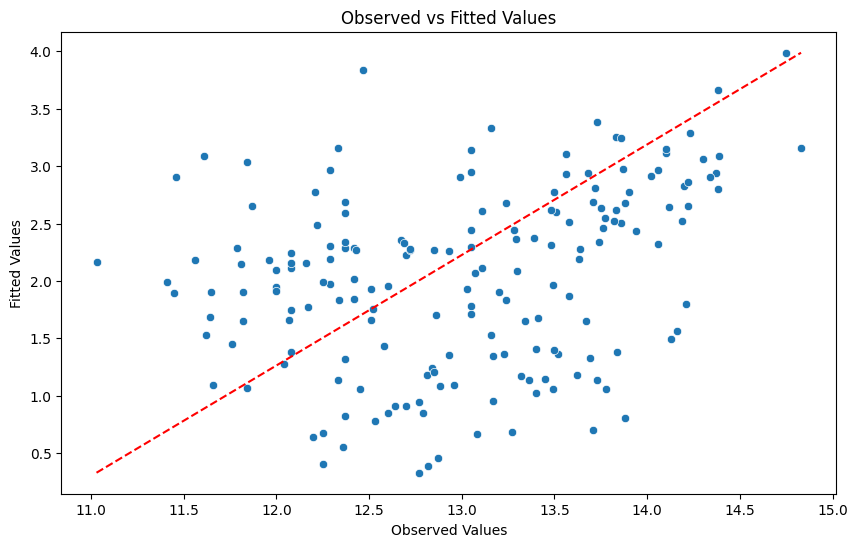

In [21]:
## A significant p-value indicates that the relationship is not linear.
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Alcohol'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['Alcohol']), max(df['Alcohol'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

Based on the scatter plot results we can determine that now that the list of predictors were included in our calculations the margins and ranges of error have drastically increased since they appear scattered around the control predicted linear mark showing weaker relationship amongst them all.

### TEST 2b:



> Shapiro Test:


Shapiro-Wilk Test: W=0.9778346419334412, p-value=0.00613793358206749


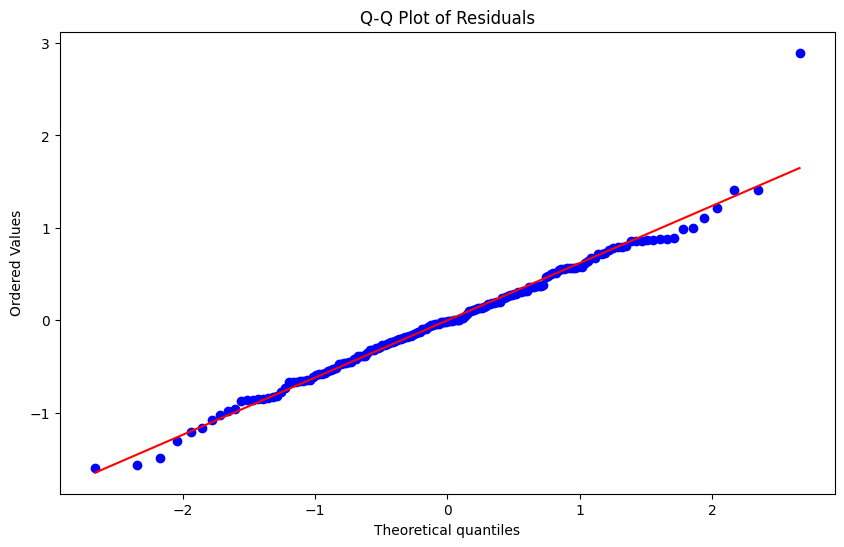

In [22]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

Based on the plot and the much higher p-value calculated we can determine that the relationship appears to be much weaker than before the list of predictors were added, which also supports the results in test 1b from the fitted values scatter plot.

### TEST 3b:

In [23]:
##### Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=2.779708704875656, p-value=2.71130865673538e-06


#Multiple regression file code:

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [18]:
##### Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=2.779708704875656, p-value=2.71130865673538e-06


P-value is still considered extremely small to be contributing to the dataset.

In [19]:
# Checking multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)


VIF Data:
          Variable         VIF
0            const  370.871012
1          Alcohol    1.484574
2        Malicacid    1.136136
3              Ash    1.094277
4  Proanthocyanins    1.085426
5  Color_intensity    1.550831


All variables from collinirearity above are appropriate to keep as is since:  (Any value less than 10 we are OK to keep)